# Week 2 - Implementation of Shaffer et al

In [1]:
# This line tells matplotlib to include plots here
%matplotlib inline
import numpy as np # We'll need numpy later
import pandas as pd
from scipy.stats import kstest, ttest_ind, ks_2samp, zscore
import matplotlib.pyplot as plt # This lets us access the pyplot functions

## (1) Estimation of a sample mean from a normally distributed variable.

Let us assume that a true distribution of a process is described by the normal distribution with $\mu=5$ and $\sigma=1$. You have a measurement technique that allows you to sample n points from this distribution. In Python we can use a random number generator whose numbers will be chosen from the desired normal distribution by using the function `np.random.normal`. Sample from this normal distribution from n=1 to 50 (i.e. n=1:50). Create a plot for the standard deviation of the calculated mean from each n when you repeat the sampling 1000 times each. (i.e. You will repeat your n observations 1000 times and will calculate the sample mean for each of the 1000 trials).

In [2]:
n_values = np.arange(1, 51, 1)
n_means = []
for n in n_values:
    means = [np.mean(np.random.normal(5, 1, n)) for i in range(1000)]
    n_means.append(means)

#### 1a. Plot the standard deviation of the sample mean versus n. Add a second line which is 1/sqrt(n). Describe what this tells you about the relationship between n and your power to estimate the underlying mean.

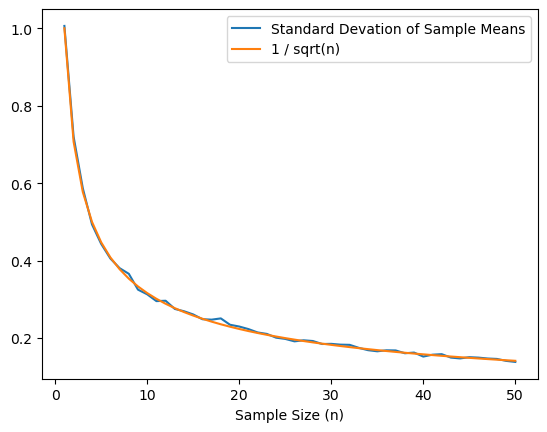

In [3]:
n_stds = [np.std(n_mean, ddof=1) for n_mean in n_means]
inverse_n = [1 / np.sqrt(n) for n in n_values]

plt.plot(n_values, n_stds)
plt.plot(n_values, inverse_n)

plt.legend(['Standard Devation of Sample Means', '1 / sqrt(n)'])
plt.xlabel('Sample Size (n)');
plt.show()





As we can see, increasing n minimizes the standard deviation of our sample means. This suggests that with greater n, our sample means are closer across samples, indicating that our sample means are generally closer to the real mean of the underlying population. Therefore, as n increases, so does our ability to estimate the underlying mean.

#### 1b. Plot the boxplot for the sample means for all values n. Using words, interpret what the boxplot view of the 1000 trials for n=1 means and what the trends in the boxplot demonstrate compared to the plot in 1a. What information do you gain or lose in the two different plotting schemes?

(A) Boxplots showing all values n:


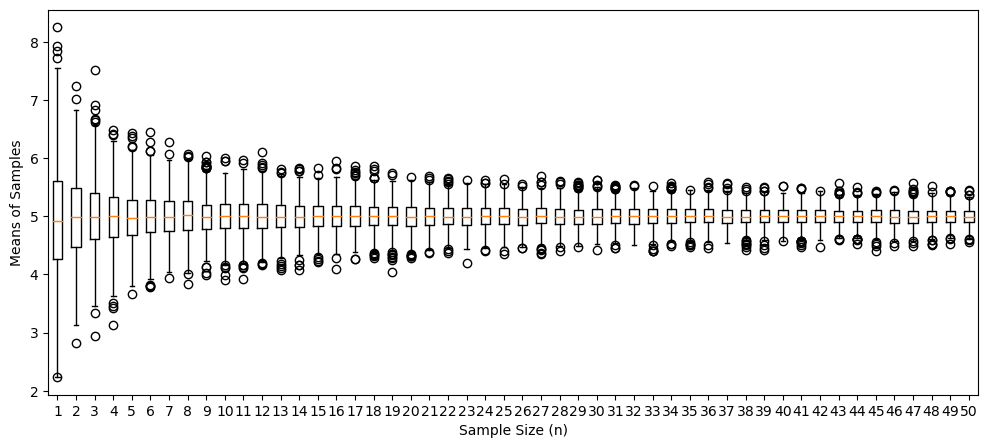

(B) Boxplot showing n=1


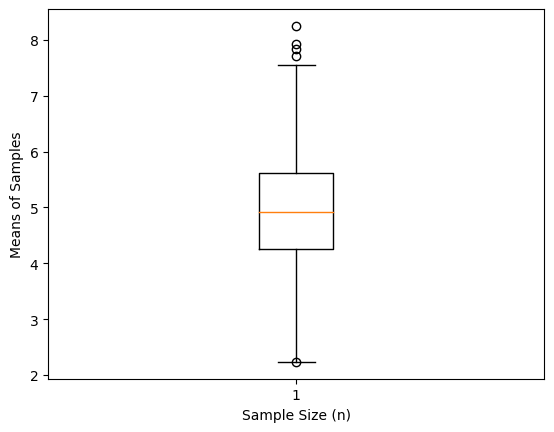

In [4]:
print('(A) Boxplots showing all values n:')

plt.figure(figsize=(12, 5))
plt.boxplot(n_means)
plt.ylabel('Means of Samples')
plt.xlabel('Sample Size (n)')
plt.show()

print('(B) Boxplot showing n=1')

plt.boxplot(n_means[0])
plt.ylabel('Means of Samples')
plt.xlabel('Sample Size (n)')
plt.show()

The boxplot for n=1 gives us useful information about the shape of our distribution. The box and whiskets are centered around 5, which is the median of these 1000 n=1. This makes sense because the boxplot samples should be normally distributed around the mean 5. We can also see that values that deviate from the median are becoming increasingly rare; the box's margins (25th and 75th percentiles) are close to the median in relation to whisker lengths, and there are few outliers.

What information do you gain or lose in the two different plotting schemes?
1) Displaying the 25th, 50th, and 75th percentiles, as well as identifying outliers for each n. 
2) Showing the sample mean values; we can see the range of sample means for each n, whereas the line plot simply shows their standard deviation. 
3) The whiskers in the box plots can be used to approximate the variance of each n, while the line plot explicitly plots this variance.

#### 1c. For n=3, plot the histogram of the mean for the 1000 trials. Use the Kolmogorov-Smirnov test to see if this sample distribution is normal. (Hint: You may need to translate this to the *standard* normal distribution.) Report the sample mean and sample standard deviation, the p-value from the test, and whether you would reject the null hypothesis.

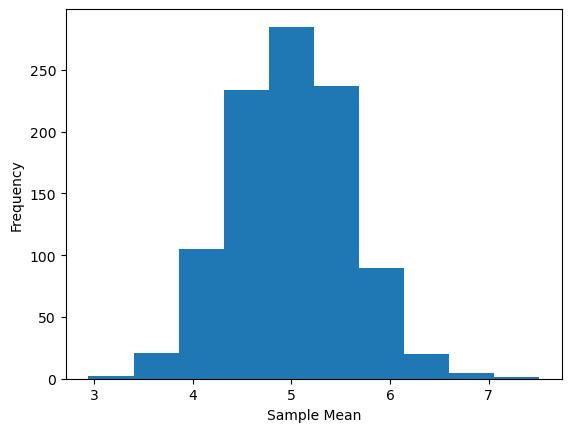

For n=3:
Mean of sample means: 4.999194285976047
Standard deviation of sample means: 0.5869955834266287
p-value of KS test: 0.9822858477639103


In [5]:
sample_group = n_means[2]
plt.hist(sample_group)
plt.ylabel('Frequency')
plt.xlabel('Sample Mean')

pop_std = np.std(sample_group, ddof=1)
pop_mean = np.mean(sample_group)
normalized = [(mean - pop_mean) / pop_std for mean in sample_group]  # translate to the standard normal distribution
test_stat, p_value = kstest(normalized, 'norm')
plt.show()

print('For n=3:');
print(f'Mean of sample means: {pop_mean}');
print(f'Standard deviation of sample means: {pop_std}');
print(f'p-value of KS test: {p_value}');

In the experiment mentioned, we assumed that the sample comes from a normal distribution (null hypothesis) and that it does not (alternate hypothesis). With a significance level of 0.05, the results showed that the probability (p-value) of the sample coming from a normal distribution is greater than 0.05, so we cannot reject the idea that the sample is from a normal distribution.

#### 1d. Repeat 1c but for n=20. What changes when the number of samples increases?

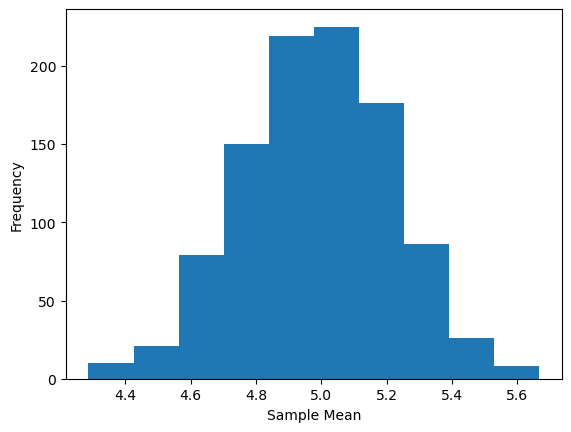

For n=3:
Mean of sample means: 4.989050758337559
Standard deviation of sample means: 0.2299022230181243
p-value of KS test: 0.9266410849659592


In [6]:
sample_group = n_means[19]
plt.hist(sample_group)
plt.ylabel('Frequency')
plt.xlabel('Sample Mean')

pop_std = np.std(sample_group, ddof=1)
pop_mean = np.mean(sample_group)
normalized = [(mean - pop_mean) / pop_std for mean in sample_group]  # translate to the standard normal distribution
test_stat, p_value = kstest(normalized, 'norm')
plt.show()

print('For n=3:')
print(f'Mean of sample means: {pop_mean}')
print(f'Standard deviation of sample means: {pop_std}')
print(f'p-value of KS test: {p_value}')

In the experiment discussed, the assumption was made that the sample comes from a normal distribution (null hypothesis) and that it does not (alternate hypothesis). With a significance level of 0.05, the results showed that the probability (p-value) of the sample coming from a normal distribution is greater than 0.05, so we cannot reject the idea that the sample is from a normal distribution. Additionally, when compared to a similar experiment (1c), the same conclusion was reached, however, it can be observed that the p-value obtained in this experiment is larger, which suggests that the sample means for n=20 are more likely to be from a normal distribution than those for n=3.

## (2) Now we will explore sampling from an alternate distribution type.

#### 2a. Sample the Pareto distribution (`np.random.pareto`) with parameter shape = 2, 1000 times. Plot the histogram of these values. Describe the shape of this histogram in words. Is it anything like the normal distribution?

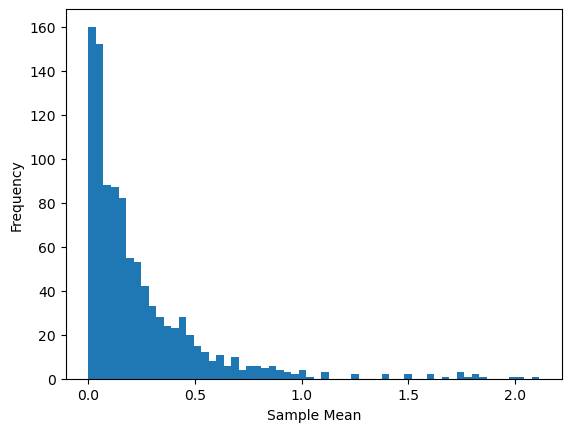

In [7]:
samples = np.random.pareto(5, size=1000)

plt.hist(samples, 60)
plt.ylabel('Frequency')
plt.xlabel('Sample Mean')
plt.show()

The histogram does not resemble a normal distribution. It appears to follow a Pareto distribution, which is characterized by non-negative values and a concentration of most of its values around 0. As the values move farther away from 0, they appear to become less frequent in an exponential manner.





#### 2b. As in problem 1, plot a boxplot of the sample distribution from n=1:50. How does this differ from the plot in 1b and why? Plot the standard deviations of the sample means versus n. Is this any different?

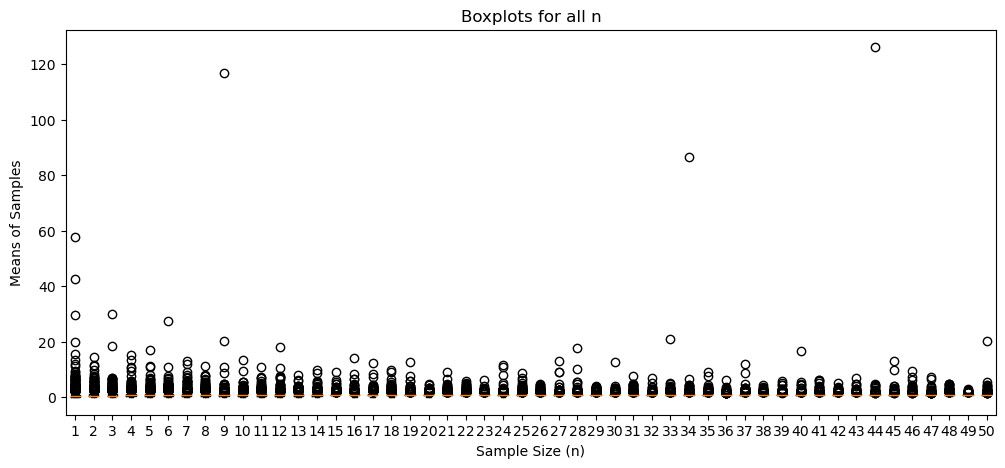

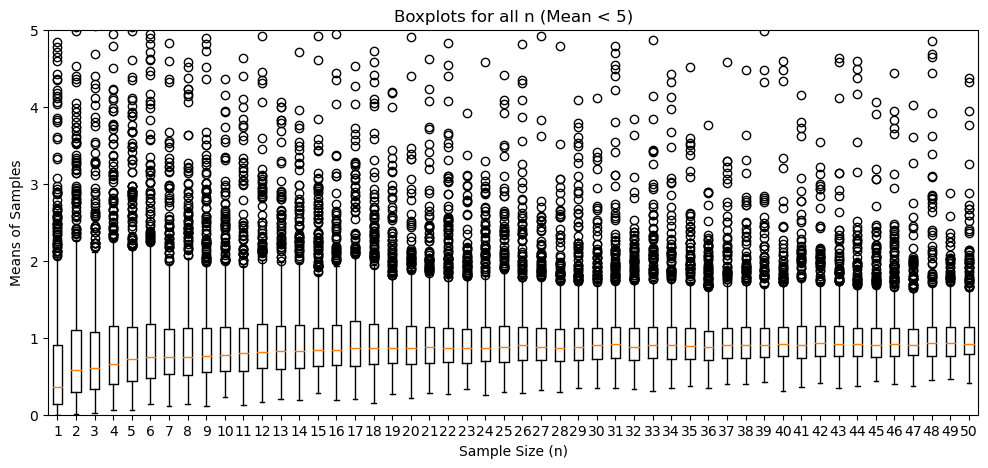

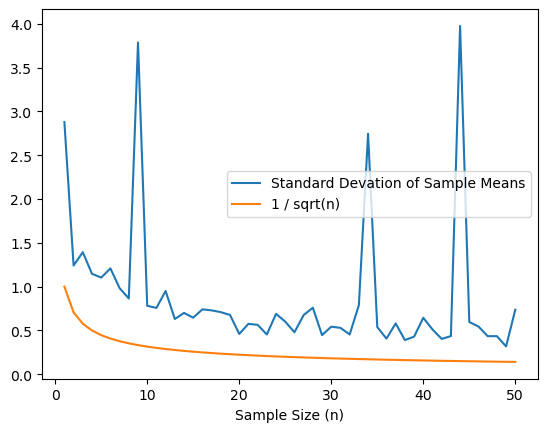

In [8]:
n_values = np.arange(1, 51, 1)
n_means = []
for n in n_values:
    means = [np.mean(np.random.pareto(2, size=n)) for i in range(1000)]
    n_means.append(means)

    n_stds = [np.std(n_mean, ddof=1) for n_mean in n_means]
    
plt.figure(figsize=(12, 5))
plt.boxplot(n_means)
plt.title('Boxplots for all n')
plt.ylabel('Means of Samples')
plt.xlabel('Sample Size (n)')
plt.show()

plt.figure(figsize=(12, 5))
plt.boxplot(n_means)
plt.title('Boxplots for all n (Mean < 5)')
plt.ylabel('Means of Samples')
plt.xlabel('Sample Size (n)')
plt.ylim([0, 5])
plt.show()

n_stds = [np.std(n_mean, ddof=1) for n_mean in n_means]
inverse_n = [1 / np.sqrt(n) for n in n_values]
plt.plot(n_values, n_stds)
plt.plot(n_values, inverse_n)
plt.legend(['Standard Devation of Sample Means', '1 / sqrt(n)'])
plt.xlabel('Sample Size (n)')
plt.show()

From the code results, we can observe that the boxplots and line-plot of the sample mean standard deviations deviate significantly from those of a normal distribution. The boxplots show that the sample means have a tighter distribution with shorter whiskers for each sample size, which is likely due to the smaller variance in the underlying Pareto distribution. Additionally, it is observed that as the sample size increases, the median value of the sample means also increases. On the other hand, the line-plot depicting the relationship between the sample size and the standard deviation of sample means shows a decrease similar to that of samples from a normal distribution, but with a greater standard deviation of sample means. This decrease follows the 1/sqrt(n) trajectory and deviate by a constant value.





#### 2c. For n=3, plot the histogram of the sample means. What is this distribution—Pareto or normal? Report your test results.

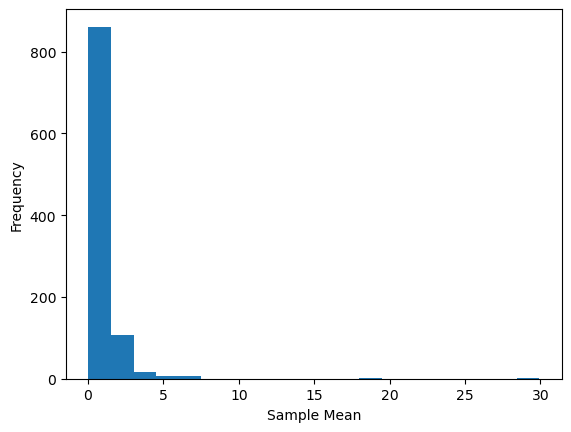

For n=3:
Kolmogorov-Smirnov test statistic (against normal distribution): 0.2648898543601456
Kolmogorov-Smirnov test statistic (against pareto distribution): 0.724
Kolmogorov-Smirnov p-value (against normal distribution): 2.0094511688617604e-62
Kolmogorov-Smirnov p-value (against pareto distribution): 0.0


In [9]:
sample_group = n_means[2]
plt.hist(sample_group, 20)
plt.ylabel('Frequency')
plt.xlabel('Sample Mean')
plt.show()

pop_std = np.std(sample_group, ddof=1)
pop_mean = np.mean(sample_group)
normalized = [(mean - pop_mean) / pop_std for mean in sample_group] 
stat_normal, p_normal = kstest(normalized, 'norm')

stat_pareto, p_pareto = kstest(sample_group, 'pareto', args=(5,))

print('For n=3:')
print(f'Kolmogorov-Smirnov test statistic (against normal distribution): {stat_normal}')
print(f'Kolmogorov-Smirnov test statistic (against pareto distribution): {stat_pareto}')
print(f'Kolmogorov-Smirnov p-value (against normal distribution): {p_normal}')
print(f'Kolmogorov-Smirnov p-value (against pareto distribution): {p_pareto}')

The histogram above suggests that the distribution is more similar to a Pareto distribution, characterized by most of the values close to 0 and fewer at higher values. This is supported by the KS test statistic that is slightly higher for the normal distribution than the Pareto distribution. However, the p-values from the KS tests show that the distribution doesn't match either the Pareto or normal distribution as both p-values are well below 0.05. This suggests that the distribution is neither Pareto or normal.





#### 2d. Repeat 2b and 2c for n=100.

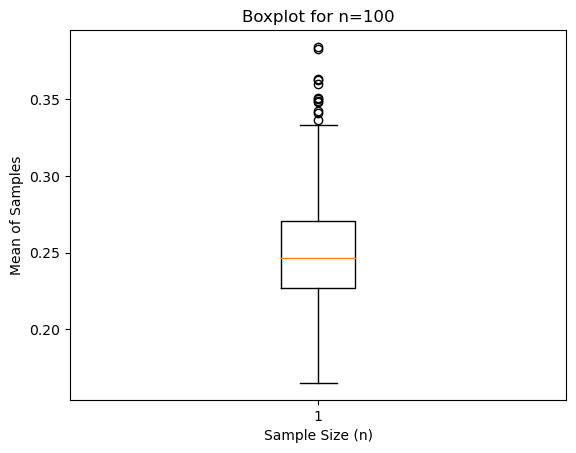

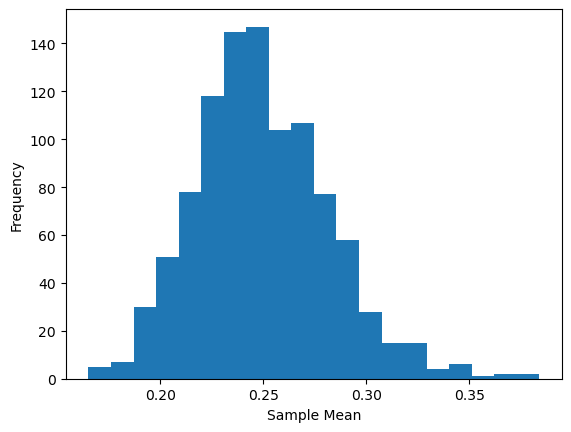

For n=100:
Kolmogorov-Smirnov test statistic (against normal distribution): 0.04557235331518272
Kolmogorov-Smirnov test statistic (against pareto distribution): 1.0
Kolmogorov-Smirnov p-value (against normal distribution): 0.03044213286523967
Kolmogorov-Smirnov p-value (against pareto distribution): 0.0


In [10]:
means = [np.mean(np.random.pareto(5, size=100)) for i in range(1000)]

plt.boxplot(means)
plt.title('Boxplot for n=100')
plt.ylabel('Mean of Samples')
plt.xlabel('Sample Size (n)')
plt.show()

plt.hist(means, 20)
plt.ylabel('Frequency')
plt.xlabel('Sample Mean')
plt.show()

pop_std = np.std(means, ddof=1)
pop_mean = np.mean(means)
normalized = [(mean - pop_mean) / pop_std for mean in means]  
stat_normal, p_normal = kstest(normalized, 'norm')

stat_pareto, p_pareto = kstest(means, 'pareto', args=(5,))

print('For n=100:')
print(f'Kolmogorov-Smirnov test statistic (against normal distribution): {stat_normal}')
print(f'Kolmogorov-Smirnov test statistic (against pareto distribution): {stat_pareto}')
print(f'Kolmogorov-Smirnov p-value (against normal distribution): {p_normal}')
print(f'Kolmogorov-Smirnov p-value (against pareto distribution): {p_pareto}')

In the boxplot for n=100, we see that the boxplot for the Pareto distribution samples differ from the normal distribution boxplots. It is seen that the boxplot is much more asymmetrical, with the majority of the outliers lying above the upper whisker, unlike the normal distribution boxplots where the outliers were present on both sides of the whiskers. Additionally, the outliers in this boxplot are smaller than those in the boxplots with lower sample size.

Similar to the previous case, it is found that the distribution of sample means is neither Pareto nor normal. The histogram is closer to a normal distribution than in the n=3 case, but the KS test results are inconclusive, as it may either reject or accept the null hypothesis depending on the run.

## (3) Differential expression. In this problem you will use the two-sample t-test to explore what differential hypothesis testing looks like in known standards and how multiple hypothesis correction effects the number of false positives and negatives from these tests.
- Distribution 1, normal with mu=1, sigma=1
- Distribution 2, normal with mu=3, sigma=1

#### 3a. False Negative: Using n=3, perform 100 comparisons of distribution 1 versus distribution 2 with an alpha=0.05. Anytime you fail to reject the hypothesis it is a false negative. Why is this a false negative? Report the number of false negatives from your 100 tests.

Hint: It'd be helpful to define a function that does this for you at this point.

In [11]:
def get_p_values(mu_1, sigma_1, mu_2, sigma_2, n, trials):
    p_values = []
    for trial in range(trials):
        dist_1 = np.random.normal(mu_1, sigma_1, n)
        dist_2 = np.random.normal(mu_2, sigma_2, n)
        _, p_value = ttest_ind(dist_1, dist_2)
        p_values.append(p_value)
    
    return np.array(p_values)

p_values = get_p_values(1, 1, 3, 1, 3, 100)
false_neg = np.sum(p_values > 0.05)
print(f'Number of false negatives: {false_neg}')

Number of false negatives: 50


In our study, we are examining the assumption that the two datasets come from the same source against the notion that they come from different sources. Given our setup, we are aware that the samples are generated from different distributions with varying means. Based on this information, it is clear that the alternative hypothesis is accurate. As a result, if we fail to reject the null hypothesis, we make an error by accepting the null hypothesis, which is referred to as a false negative.





#### 3b. False Positives: Using n=3, perform 100 comparisons of distribution 1 versus distribution 1 with an alpha=0.05. Anytime you reject the hypothesis this is a false positive. Why is this a false positive? Report the number of false positives from your 100 tests.

In [12]:
p_values = get_p_values(1, 1, 1, 1, 3, 100)
false_pos = np.sum(p_values < 0.05)
print(f'Number of false positives: {false_pos}')

Number of false positives: 3


In our study, we are evaluating the assumption that the two sets of data come from the same population against the alternative hypothesis that they do not. Given the design of our experiment, we are aware that the samples are generated from the same distribution, and thus we know that the alternative hypothesis is not true. Therefore, if we reject the null hypothesis, we are making an error by accepting the alternative hypothesis and this would be considered a false positive.





#### 3c. Repeat 3b but 1000 times. What is the number of false positives? Predict the number of false positives you would get if you compared samples from the same distribution 10,000 times and explain why.

In [13]:
p_values = get_p_values(1, 1, 1, 1, 3, 1000)
false_pos = np.sum(p_values < 0.05)
print(f'Number of false positives: {false_pos}')

Number of false positives: 57


In our experiment, we have set our alpha level to 0.05, which means that we are willing to accept a 5% chance of a false positive. Since we are conducting 10,000 trials, we can expect to see approximately 0.05 * 10,000 = 500 false positives. This is because a false positive occurs when we reject the null hypothesis, even though it is true. With an alpha level of 0.05, there is a 5% chance that we will incorrectly reject the null hypothesis in any given trial, leading to an expected 500 false positives over 10,000 trials.





#### 3d. Now sweep n from 3 to 30 and report the number of false positives and false negatives for each n when you run 100 comparisons. (Provide this in a table format). Please explain the trend you see and interpret its meaning.

In [14]:
n_range = np.arange(3, 31, 1)
results = pd.DataFrame(index=['False Positives', 'False Negatives'], columns=n_range)

for n in n_range:
    false_pos_p = get_p_values(1, 1, 1, 1, n, 100)
    false_neg_p = get_p_values(1, 1, 3, 1, n, 100)
    
    results.loc['False Positives', n] = sum([1 if p < 0.05 else 0 for p in false_pos_p])
    results.loc['False Negatives', n] = sum([1 if p > 0.05 else 0 for p in false_neg_p])

results.index.name = 'Error Type'
results.columns.name = 'n'
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(results)

n                3   4   5  6  7  8  9  10 11 12 13 14 15 16 17 18 19 20 21  \
Error Type                                                                    
False Positives   6   4   6  3  2  7  7  5  5  7  4  6  6  7  2  4  6  5  5   
False Negatives  59  37  15  8  5  2  2  3  2  1  0  0  0  0  0  0  0  0  0   

n               22 23 24 25 26 27 28 29 30  
Error Type                                  
False Positives  4  3  8  8  7  3  4  8  8  
False Negatives  0  0  0  0  0  0  0  0  0  


This suggests that as the sample size increases, the likelihood of committing a type 2 error (false negative) decreases, while the likelihood of committing a type 1 error (false positive) remains relatively constant. This implies that increasing the sample size can help reduce the number of false negatives, but it will not have a significant impact on the number of false positives.





#### 3e. For n=3, suggest how the number of false negatives changes according to sigma for the two distributions and test this. Report your new values and sigma and the number of false negatives in 100 tests.

In [15]:
sigmas = np.arange(0.5, 3.5, 0.5)
results = pd.DataFrame(index=['False Negatives'], columns=sigmas)

for sigma in sigmas:
    false_neg_p = get_p_values(1, sigma, 3, sigma, 3, 100)
    results.loc['False Negatives', sigma] = sum([1 if p > 0.05 else 0 for p in false_neg_p])

results.columns.name = 'Sigma'
results.index.name = 'Error Type'
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(results)

Sigma           0.5 1.0 1.5 2.0 2.5 3.0
Error Type                             
False Negatives   1  56  73  82  87  91


My hypothesis was that with larger values of sigma, the number of false positives would increase. I believed this would occur because a larger sigma would increase the variance of samples drawn from both distributions. This increased variance would make it more likely that a value drawn from one distribution could be close to the mean of the other distribution, even if the means were different. The table above supports this hypothesis as it shows that the number of false positives increases as sigma increases for both distributions. Additionally, we can see that decreasing sigma from 1 to 0.5 greatly reduces the number of false positives.






#### 3f. Lastly, perform 3d for p < 0.01 instead of p < 0.05. How does this influence the rate of false positives and negatives? How might you use this when performing many tests?

In [16]:
results = pd.DataFrame(index=['False Positives', 'False Negatives'], columns=n_range)

for n in n_range:
    false_pos_p = get_p_values(1, 1, 1, 1, n, 100)
    false_neg_p = get_p_values(1, 1, 3, 1, n, 100)
    
    results.loc['False Positives', n] = sum([1 if p < 0.01 else 0 for p in false_pos_p])
    results.loc['False Negatives', n] = sum([1 if p > 0.01 else 0 for p in false_neg_p])

results.index.name = 'Error Type'
results.columns.name = 'n'
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(results)

n                3   4   5   6   7   8  9  10 11 12 13 14 15 16 17 18 19 20  \
Error Type                                                                    
False Positives   3   1   2   2   3   0  0  0  1  1  1  1  0  0  0  0  0  2   
False Negatives  82  70  45  43  22  19  8  9  6  2  1  1  1  0  0  0  0  0   

n               21 22 23 24 25 26 27 28 29 30  
Error Type                                     
False Positives  0  0  1  0  1  1  1  2  1  0  
False Negatives  0  0  0  0  0  0  0  0  0  0  


From the above results, it can be inferred that decreasing the significance level (alpha) leads to a decrease in the rate of false positives. However, the rate of false negatives does not appear to be affected by the value of alpha. When conducting multiple tests, it may be beneficial to use a lower alpha value if false positives are particularly harmful or expected to occur frequently with the given data.





## (4) Power analysis

Now that we've observed the trends above, we have all the tools to talk about power analysis. Power analysis is an essential step when designing an experiment, and asks *assuming we should be rejecting the null hypothesis, what is the probability we will do so*. The power of an experiment is equal to 1 minus the false negative rate. A common choice for the power of an experiment (like a p-value cutoff of 0.05) is 0.8.

#### 4a. Power analysis is often used to determine the necessary N of an experiment. Why might this be used as opposed to the false positive rate?

In summary, while alpha controls the false positive rate, it does not have much impact on determining the appropriate sample size N. On the other hand, power analysis, which looks at the false negative rate, is more useful in determining the appropriate sample size N. It also provides a measure of the test's ability to distinguish between two populations, making it a valuable tool in statistical analysis.






#### 4b. Determine the necessary N to acheive a power of 0.8 from the situation in (3).

In [17]:
n_range = np.arange(3, 31, 1)
results = pd.DataFrame(index=['Power'], columns=n_range)
trials = np.arange(0, 30, 1)

for n in n_range:
    n_power = []
    for i in trials:
        false_neg_p = get_p_values(1, 1, 3, 1, n, 100)
        n_power.append(1 - (sum([1 if p > 0.05 else 0 for p in false_neg_p]) / 100))
    results.loc['Power', n] = np.mean(n_power)

results.columns.name = 'n'
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(results)

n            3      4     5         6         7     8         9      10  \
Power  0.460667  0.645  0.79  0.873333  0.926333  0.96  0.975667  0.989   

n         11        12        13        14     15   16   17   18   19   20  \
Power  0.994  0.997333  0.997667  0.998667  0.999  1.0  1.0  1.0  1.0  1.0   

n       21   22   23   24   25   26   27   28   29   30  
Power  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  


## (5) Shaffer et al

In this excercise we're going to explore some basic concepts of statistics, and use them to build up to some more advanced ideas. To examine these ideas we're going to consider a classic of molecular biology—the [Luria-Delbrück experiment](https://en.wikipedia.org/wiki/Luria–Delbrück_experiment). The data we'll use is from [Shaffer et al](https://www.nature.com/articles/nature22794).

In [18]:
repOne = np.array([259, 213, 182, 167, 254, 221, 236, 168, 190, 262, 285, 158, 240, 187, 326, 116, 220, 309, 181, 268, 285, 467, 121, 177, 188, 116, 218, 195, 260, 307, 213, 314, 220, 245, 325, 220, 222, 336, 60, 268, 252, 112, 252])
repTwo = np.array([28, 72, 53, 103, 46, 90, 105, 78, 86, 127, 30, 52, 105, 111, 88, 35, 23, 119, 89, 110, 138, 79, 118, 107, 38, 71, 104, 61, 125])

#### 5a. First, we need to build up a distribution of outcomes for what an experiment would look like if it followed the Luria-Delbruck process.
Fill in the function below keeping track of normal and mutant cells. Then, make a second function, `CVofNRuns`, that runs the experiment 3000 times. You can assume a culture size of 120000 cells, and mutation rate of 0.0001 per cell per generation. What does the distribution of outcomes look like?

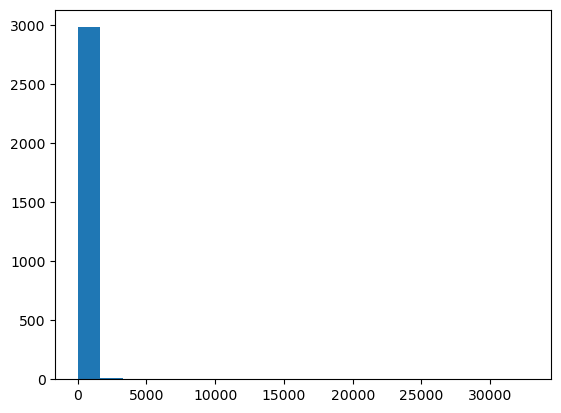

In [19]:
# Runs the simulation a bunch of times, and looks for how often the fano (cv/mean) comes out to one side

def simLuriaDelbruck(cultureSize, mutationRate):
    nCells, nMuts = 1, 0  # Start with 1 non-resistant cell

    for _ in range(int(np.floor(np.log2(cultureSize)))):  # num of gens
        nCells = nCells * 2  # Double the number of cells, simulating division
        newMuts = np.random.poisson(nCells * mutationRate)  # de novo
        nMuts = nMuts * 2 + newMuts  # Previous mutants divide and add
        nCells = nCells - newMuts  # Non-resistant pop goes down by newMuts

    return nMuts


def CVofNRuns(n_runs):
    results = []
    for i in range(n_runs):
        results.append(simLuriaDelbruck(120000, 0.0001))
    
    return results


results = CVofNRuns(3000)
plt.hist(results, 20)
plt.show()

#### 5b. Compare the distribution of outcomes between the two replicates of the experiment using the 2-sample KS test. Are they consistent with one another?
Hint: Each experiment varies slightly in the amount of time it was run. The absolute values of the numbers doesn't matter, so much as the variation of them. You'll need to correct for this by dividing by the mean of the results.

In [20]:
repOne = repOne / np.mean(repOne)
repTwo = repTwo / np.mean(repTwo)

test_stat, p_value = ks_2samp(repOne, repTwo)
print(f'KS Test Statistic: {test_stat}')
print(f'KS Test p-value: {p_value}')

KS Test Statistic: 0.25100240577385724
KS Test p-value: 0.1784655548732054


The results of the KS test suggest that the two samples are likely from the same distribution, as the p-value is greater than 0.05, indicating that we do not have enough evidence to reject the null hypothesis. However, it is worth noting that the p-value and test statistic are relatively low, indicating that the two distributions may not be very similar.





#### 5c. Compare the distribution of outcomes between the experiment and model. Are our results consistent with resistance arising through a Luria-Delbruck related process?

In [21]:
results = np.array(results)
results = results / np.mean(results)
stat_rep1, p_rep1 = ks_2samp(repOne, results)
stat_rep2, p_rep2 = ks_2samp(repTwo, results)

print(f'KS Test Statistic (experiment 1 vs. model): {stat_rep1}')
print(f'KS Test p-value (experiment 1 vs. model): {p_rep1}')
print()
print(f'KS Test Statistic (experiment 2 vs. model): {stat_rep2}')
print(f'KS Test p-value (experiment 2 vs. model): {p_rep2}')

KS Test Statistic (experiment 1 vs. model): 0.6563875968992248
KS Test p-value (experiment 1 vs. model): 2.176827098693767e-18

KS Test Statistic (experiment 2 vs. model): 0.5422528735632184
KS Test p-value (experiment 2 vs. model): 1.9655445457649962e-08


From the above, it can be concluded that the two experimental runs fail to match the distribution of the model as the p-value is below 0.05 in both KS-tests, indicating that the two samples are not from the same underlying distribution as the model. This suggests that there may be a discrepancy between the model and the experimental results. Further analysis is needed to determine the cause of this discrepancy and to improve the model.





#### 5d. We assumed a specific mutation rate and final number of cells. How might you show whether or not these parameters influence our results?

To improve our model's accuracy, we can conduct additional experiments by altering the model's parameters and comparing the results using the KS-test. Additionally, we can apply LASSO regression to identify the most important features and eliminate those that have less impact on the results.



